In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
%matplotlib inline

from matplotlib import animation, rc, cm
from IPython.display import HTML

In [4]:
class GridWord:
    
    
    '''
    A is the set of actions and we use a dic to access the cardinal directions.
    A = {"West": 'W', "North": 'N', "South": 'S', "East": 'E'}
    '''
    
    
    def __init__(self):
        
        self.number_row = 7
        self.number_column = 7
        
              
    # This function, given the state, (r,y)-position and the action, will return respectively the new position
    # and the reward
    # r : row
    # c : column
    
    def Execute_an_action(self, r, c, choosen_action):
        
        self.choosen_action = choosen_action
        self.state = [r, c]
        
        # Set of actions
        self.Set_of_Action = {"West": 'W', "North": 'N', "South": 'S', "East": 'E'}
        done = False
        
        if self.choosen_action == self.Set_of_Action["West"]:
            is_next_state_valid = self.check_if_state_valid(r, c-1)
            if is_next_state_valid:
                self.state = [r, c-1]
        elif self.choosen_action == self.Set_of_Action["North"]:
            is_next_state_valid = self.check_if_state_valid(r-1, c)
            if is_next_state_valid:
                self.state = [r-1, c]
        elif self.choosen_action == self.Set_of_Action["South"]:
            is_next_state_valid = self.check_if_state_valid(r+1, c)
            if is_next_state_valid:
                self.state = [r+1, c]
        elif self.choosen_action == self.Set_of_Action["East"]:
            is_next_state_valid = self.check_if_state_valid(r, c+1)
            if is_next_state_valid:
                self.state = [r, c+1]
        
        reward = -1.0
        
        # In this part, if the agent reaches the position (0,0), then the game is finished and
        # he will get the reward 20.
        if self.state ==[0,0]:
            reward += 20.0
            done = True
        # Here we return the next state, the reward and 'done' if the game is finished
        return self.state, reward, done
    
    
    # This function checks wheter the position of the agent is valid or not. Since we can't move off
    # grid or to the wall which is the third line, we will return False in those cases
    def check_if_state_valid(self, r, c):
        if r<0 or r >= self.number_row:
            return False
        elif c<0 or c >= self.number_column:
            return False
        elif r == 2 and c < self.number_column-1:
            return False        
        return True

In [5]:
Optimal_Value_Function = np.array([[20,19,18,17,16,15,14],
                                    [19,18,17,16,15,14,13],
                                    [0,0,0,0,0,0,12],
                                    [5,6,7,8,9,10,11],
                                    [4,5,6,7,8,9,10],
                                    [3,4,5,6,7,8,9],
                                    [2,3,4,5,6,7,8]],float)

print(Optimal_Value_Function)

[[20. 19. 18. 17. 16. 15. 14.]
 [19. 18. 17. 16. 15. 14. 13.]
 [ 0.  0.  0.  0.  0.  0. 12.]
 [ 5.  6.  7.  8.  9. 10. 11.]
 [ 4.  5.  6.  7.  8.  9. 10.]
 [ 3.  4.  5.  6.  7.  8.  9.]
 [ 2.  3.  4.  5.  6.  7.  8.]]


In [6]:
class RunningAnAgent:
    
    def __init__(self, GridWord):
        self.GridWord = GridWord
        self.iteration = 0
        
    def return_the_max(self, actual_state, Matrix):
        
        a = actual_state[0]
        b = actual_state[1]
        
        north_next_state, _, _ = self.GridWord.Execute_an_action(a, b, 'N')
        west_next_state, _, _ = self.GridWord.Execute_an_action(a, b, 'W')
        south_next_state, _, _ = self.GridWord.Execute_an_action(a, b, 'S')
        east_next_state, _, _ = self.GridWord.Execute_an_action(a, b, 'E')
        
        max_next_state_val = max(Matrix[north_next_state[0], north_next_state[1]], 
                                 Matrix[west_next_state[0], west_next_state[1]],
                                 Matrix[south_next_state[0], south_next_state[1]],
                                 Matrix[east_next_state[0], east_next_state[1]])
        
        
        
        if Matrix[north_next_state[0], north_next_state[1]] == max_next_state_val:
            return 'N'
        elif Matrix[south_next_state[0], south_next_state[1]] == max_next_state_val:
            return 'S'
        elif Matrix[west_next_state[0], west_next_state[1]] == max_next_state_val:
            return 'W'
        elif Matrix[east_next_state[0], east_next_state[1]] == max_next_state_val:
            return 'E'
        
    
    def running_the_greedy_agent(self, Optimal_Value_Function, print_traj = False):
        
        curr_grid = self.get_grid()
        images_for_animation_for_the_greedy_agent = []
        self.Optimal_Value_Function = Optimal_Value_Function
        self.iteration = 0
        self.state = [6,0]
        accumulative_return = 0
        done = False
        
        while (not done) and self.iteration < 50 :
            
            # We choose an action
            my_action = self.return_the_max(self.state, self.Optimal_Value_Function)
            
            # WE update the state
            self.state, reward, done = self.GridWord.Execute_an_action(self.state[0], 
                                                                        self.state[1], 
                                                                        my_action)
            #print("State, reward", self.state, reward,"\n")
            copy_curr_grid = curr_grid.copy()
            if print_traj:
                curr_grid[self.state[0]][self.state[1]] = 150.0
                plt.axis('Off')
                plt.imshow(curr_grid)
                plt.show()
            images_for_animation_for_the_greedy_agent.append(copy_curr_grid)
            # Accumulative reward
            accumulative_return += reward
            
            # We increment the iteration
            self.iteration += 1
            
            # Position in the GridWorld
            
            
        return accumulative_return, np.array(images_for_animation_for_the_greedy_agent)
    
    def running_the_random_agent(self, Optimal_Value_Function, print_traj = False):
        
        curr_grid = self.get_grid()
        images_for_animation_for_the_random_agent = []
        self.Optimal_Value_Function = Optimal_Value_Function
        self.iteration = 0
        self.state = [6,0]
        accumulative_return = 0
        done = False
        
        while (not done) and self.iteration < 50 :
            
            # We choose an action
            my_action = random.choice(['N','S','W','E'])
            
            # WE update the state
            self.state, reward, done = self.GridWord.Execute_an_action(self.state[0], self.state[1], my_action)
            
            copy_curr_grid = curr_grid.copy()
            if print_traj:
                curr_grid[self.state[0]][self.state[1]] = 150.0
                plt.axis('Off')
                plt.imshow(curr_grid)
                plt.show()
            images_for_animation_for_the_random_agent.append(copy_curr_grid)
            
            #print("State, reward", self.state, reward,"\n")
            # Accumulative reward
            accumulative_return += reward
            
            # We increment the iteration
            self.iteration += 1
            
        return accumulative_return, np.array(images_for_animation_for_the_random_agent)
    
    def get_grid(self):
        grid = np.zeros((7,7), np.uint8)
        for i in range(6):
            grid[2][i] = 100.0
            
        grid[6][0] = 50.0
        grid[0][0] = 255.0
        return grid

In [7]:
run = 20.0
GridWord1 = GridWord()
RunningAGreedyAgent = RunningAnAgent(GridWord1)
RunningARandomAgent = RunningAnAgent(GridWord1)


average_greedy_agent = 0
average_random_agent = 0

for i in range(int(run)):
    average_greedy_agent += RunningAGreedyAgent.running_the_greedy_agent(Optimal_Value_Function)[0]
    average_random_agent += RunningARandomAgent.running_the_random_agent(Optimal_Value_Function)[0]
print("The average reward after 20 runs for the greedy agent is :", average_greedy_agent/run)
print("\n The average reward after 20 runs for the random agent is :", average_random_agent/run)

The average reward after 20 runs for the greedy agent is : 2.0

 The average reward after 20 runs for the random agent is : -50.0


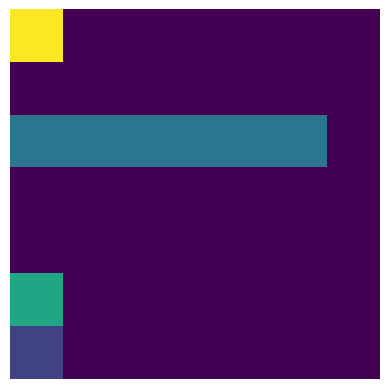

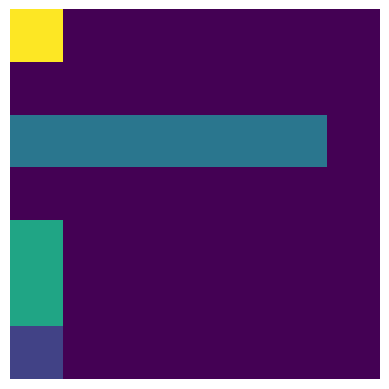

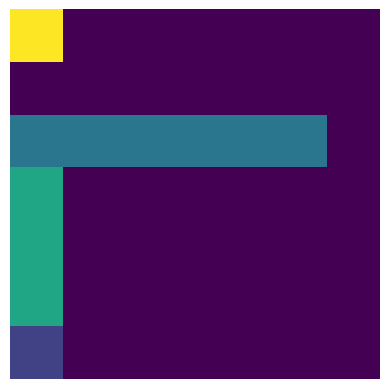

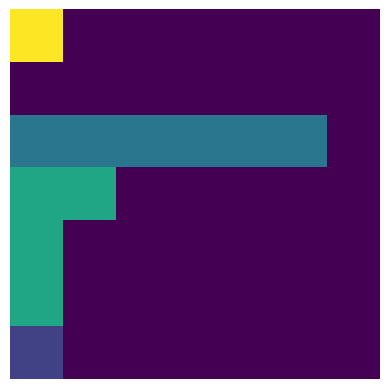

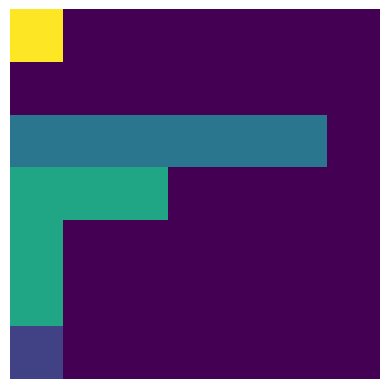

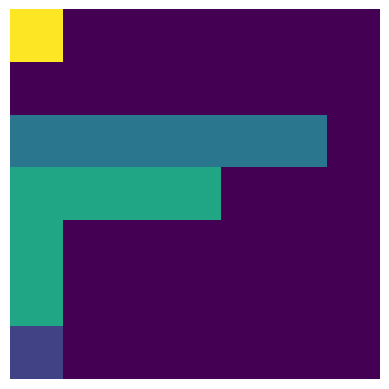

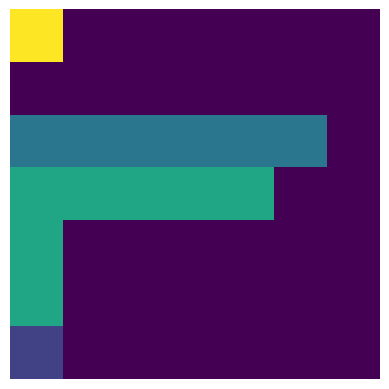

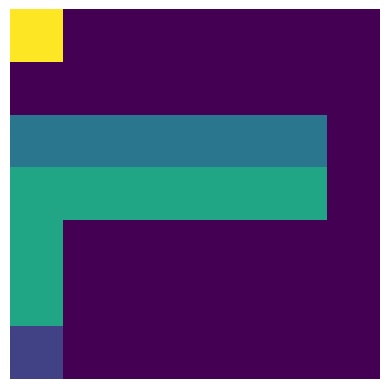

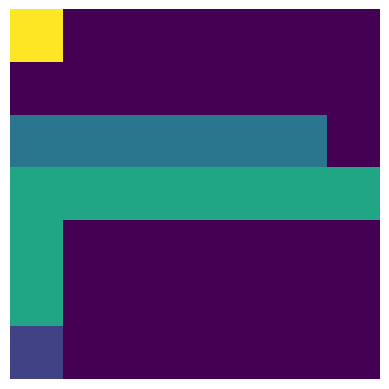

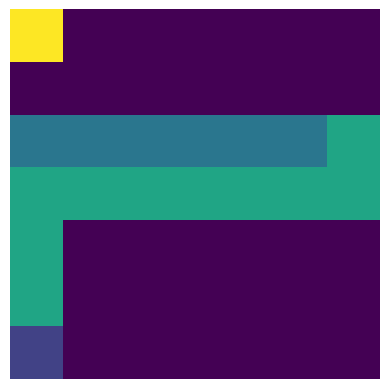

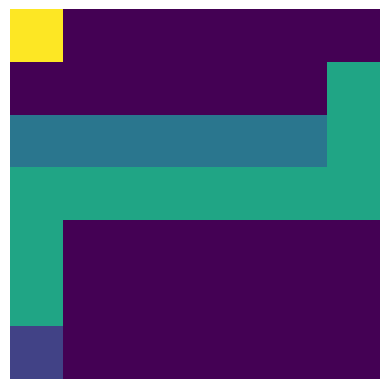

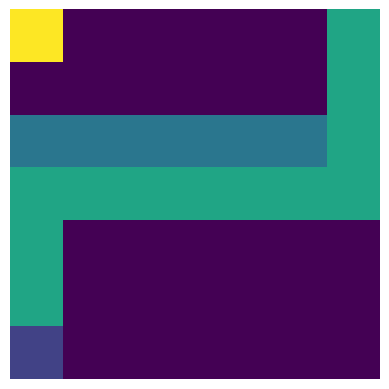

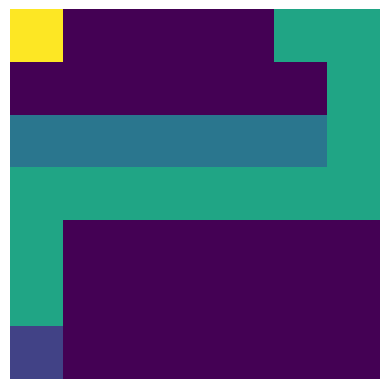

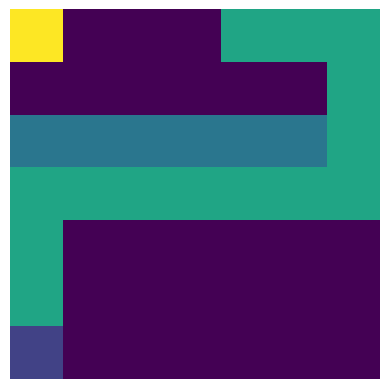

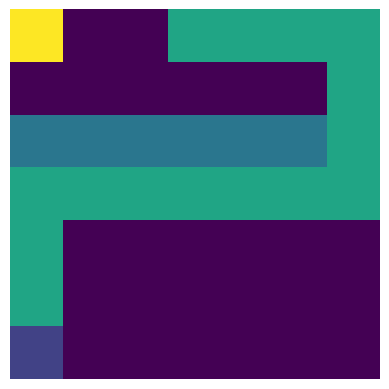

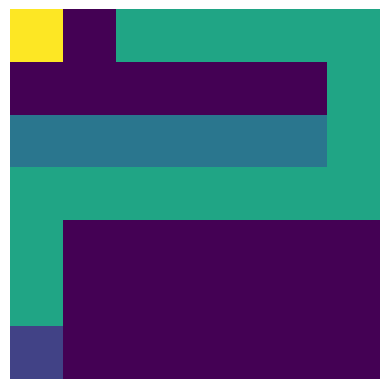

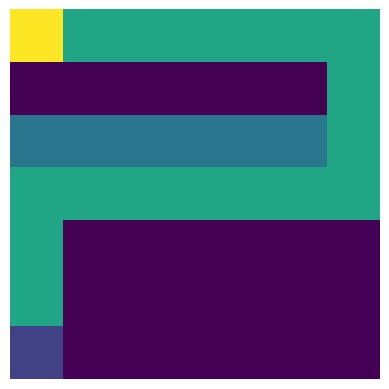

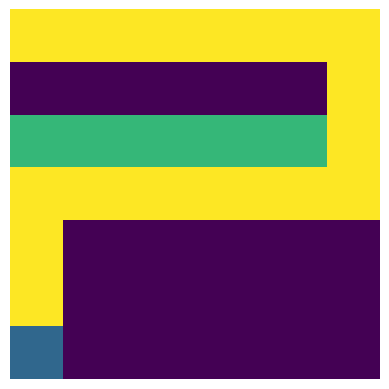

In [7]:
_, movement_of_the_greedy_agent =RunningAGreedyAgent.running_the_greedy_agent(Optimal_Value_Function, print_traj = True)

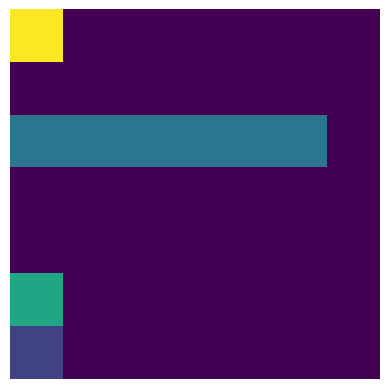

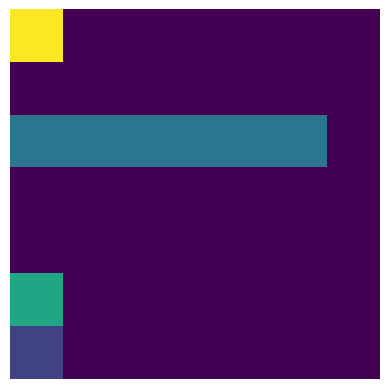

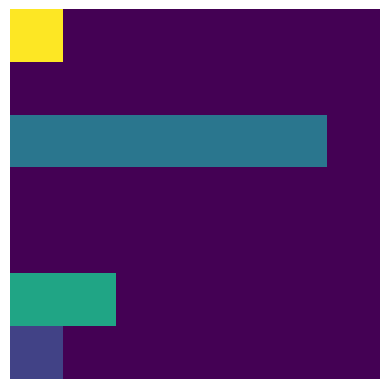

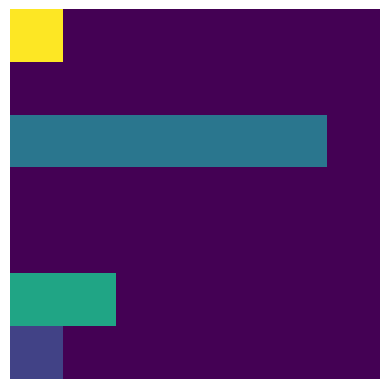

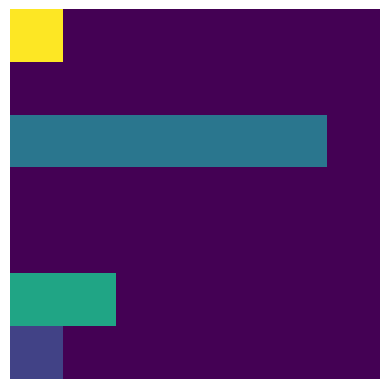

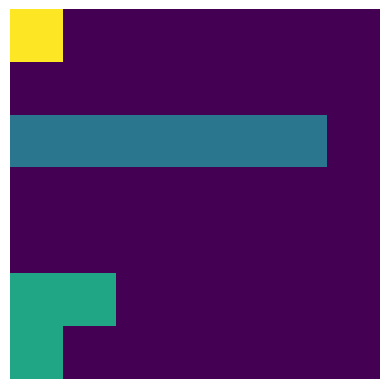

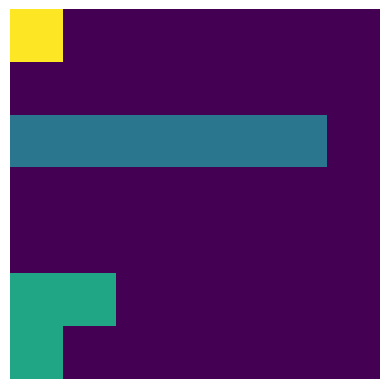

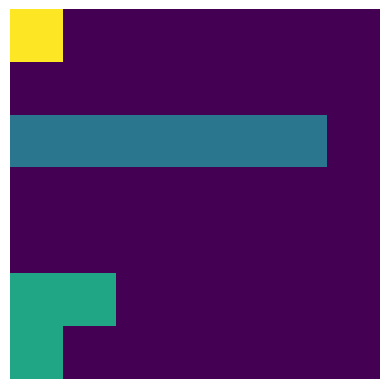

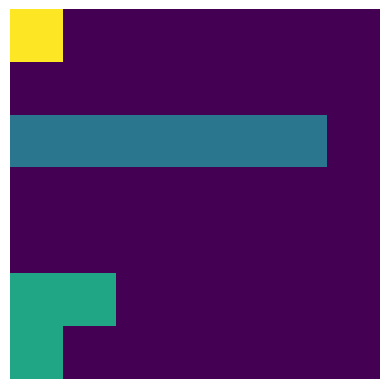

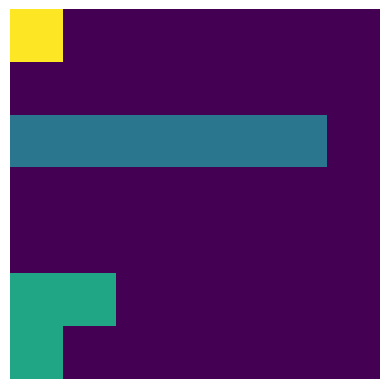

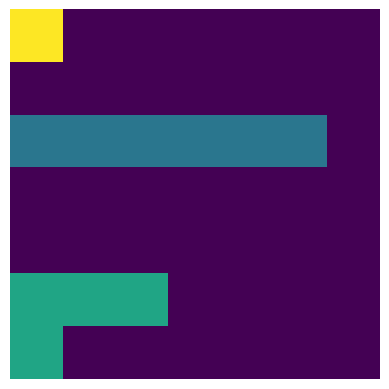

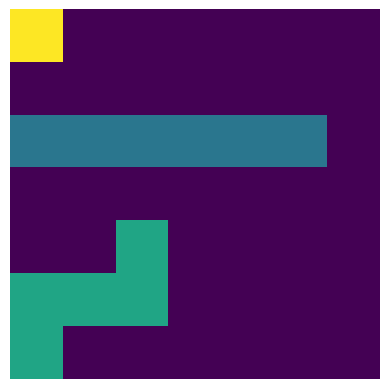

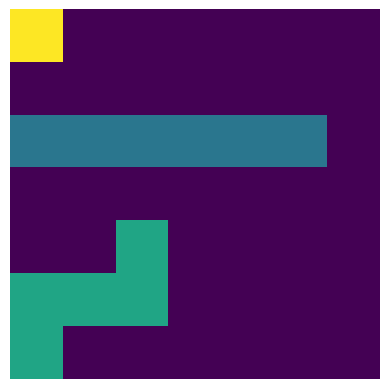

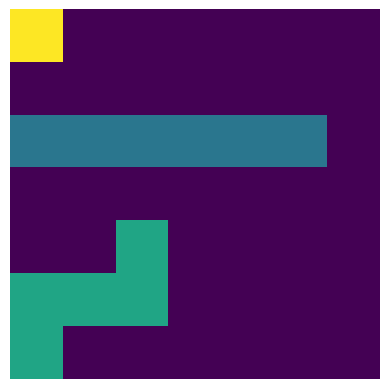

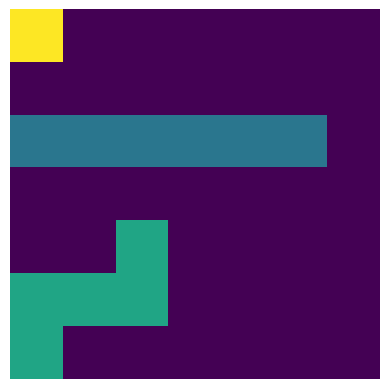

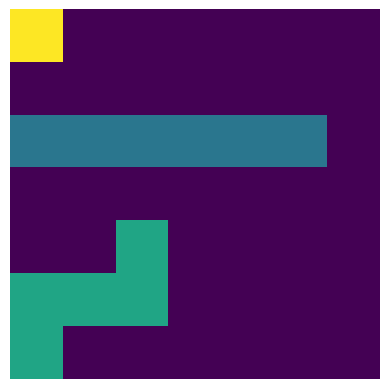

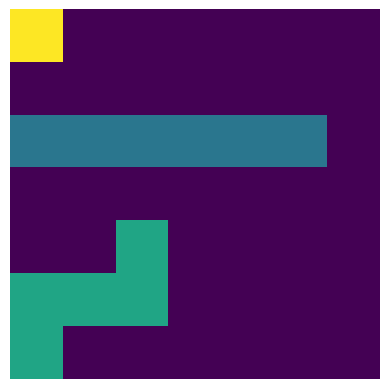

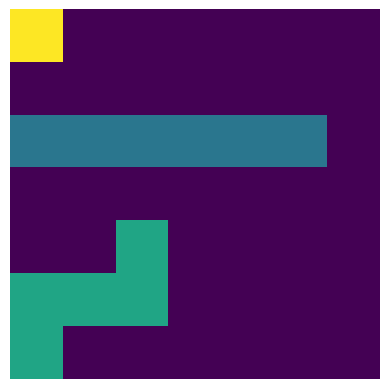

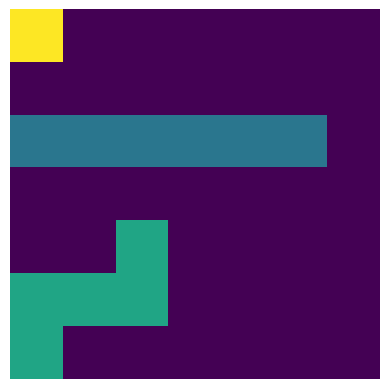

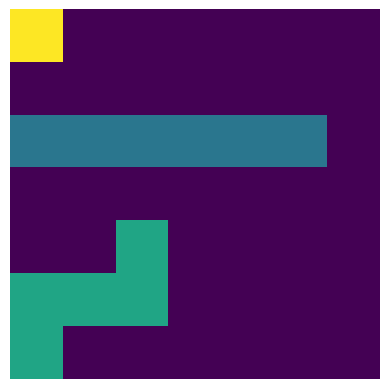

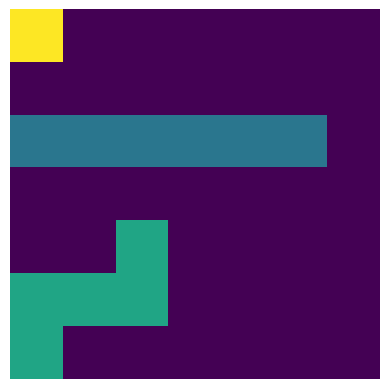

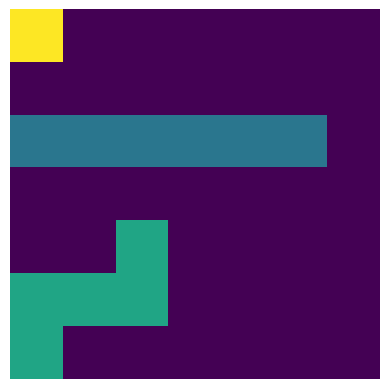

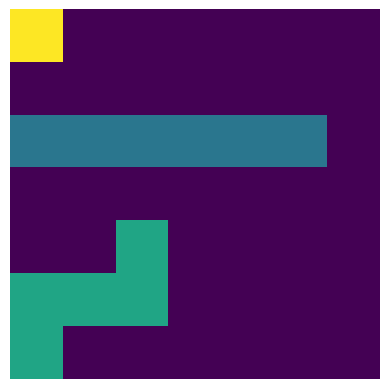

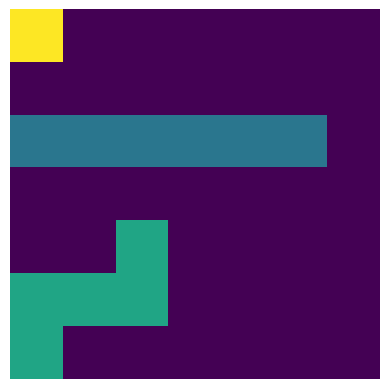

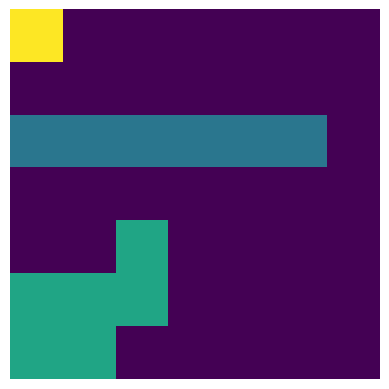

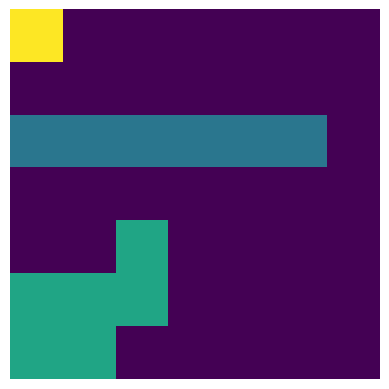

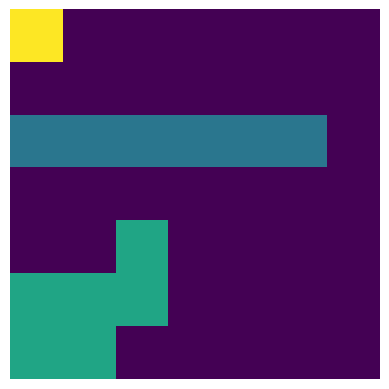

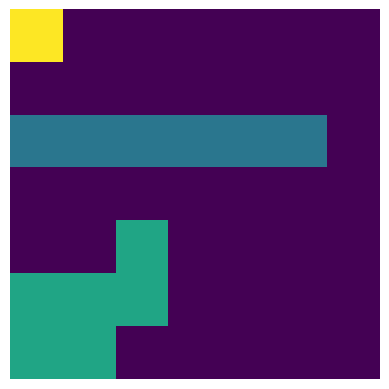

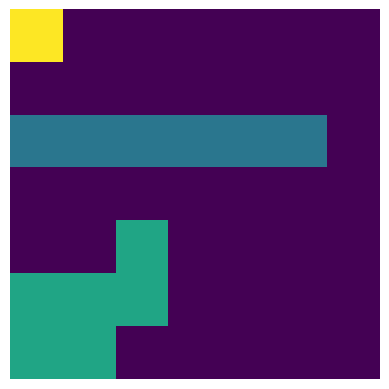

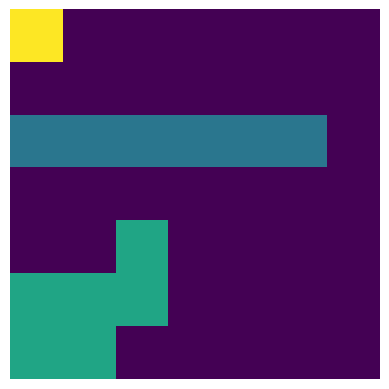

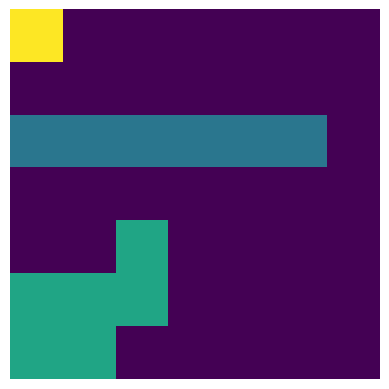

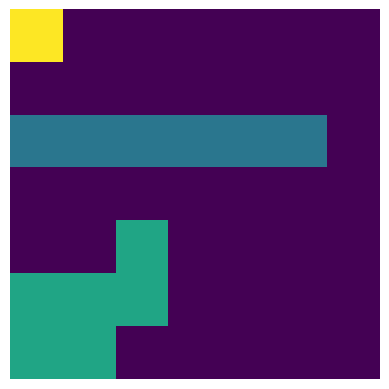

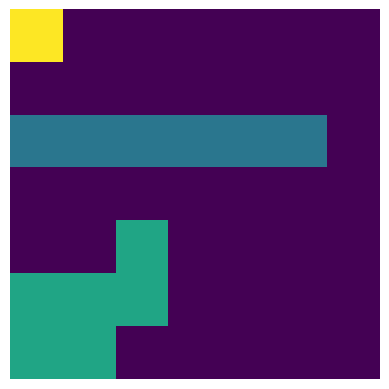

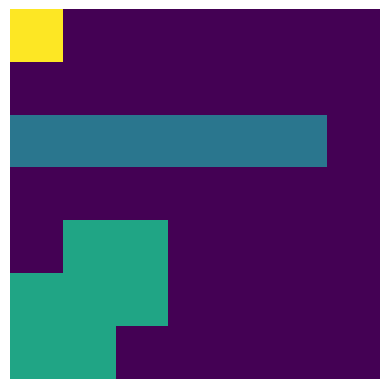

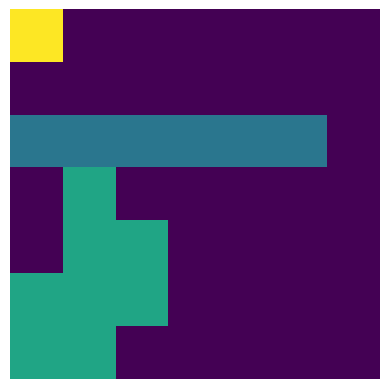

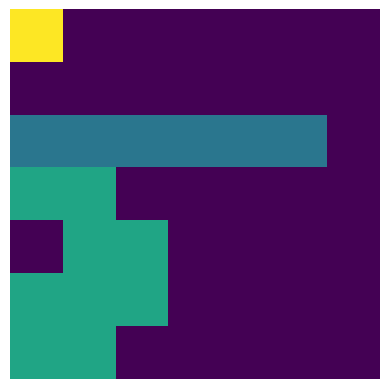

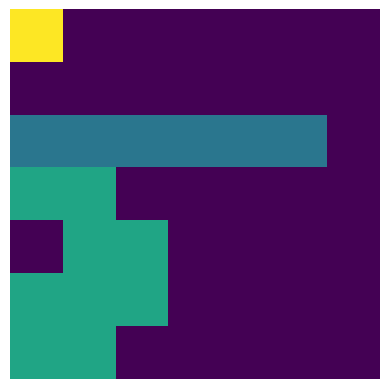

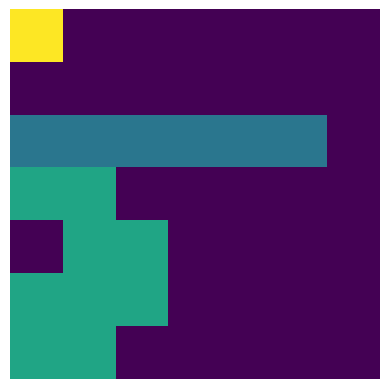

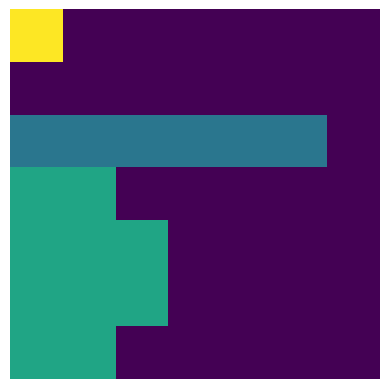

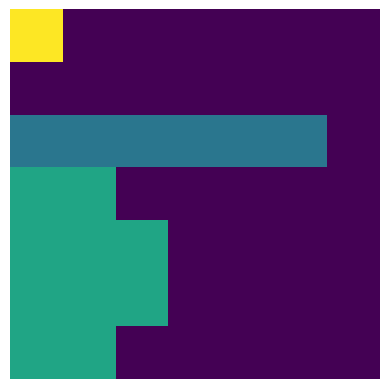

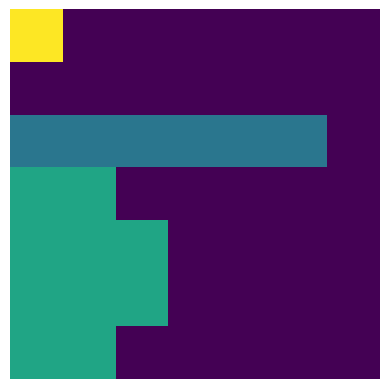

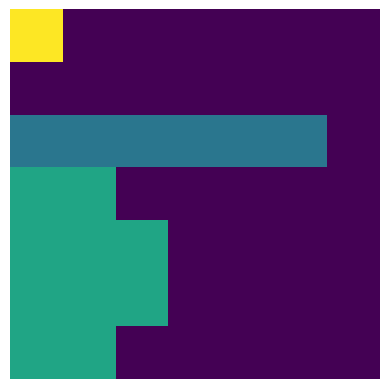

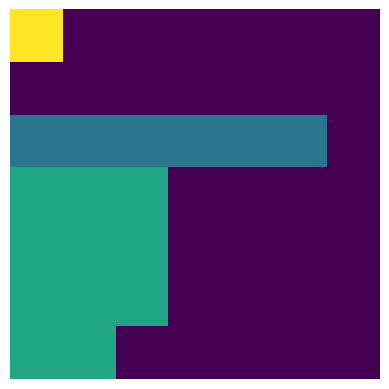

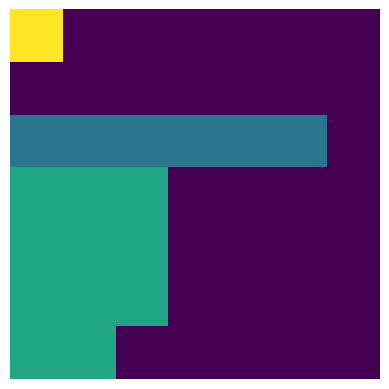

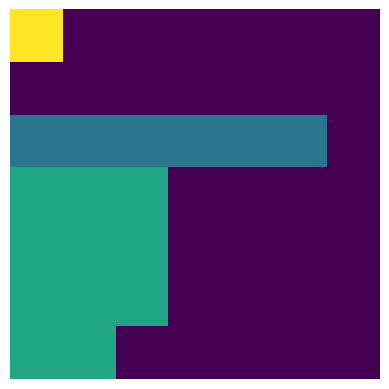

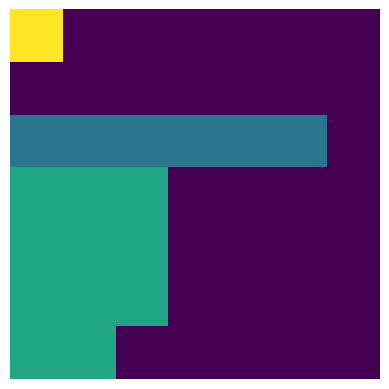

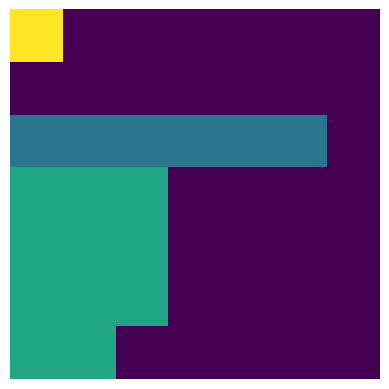

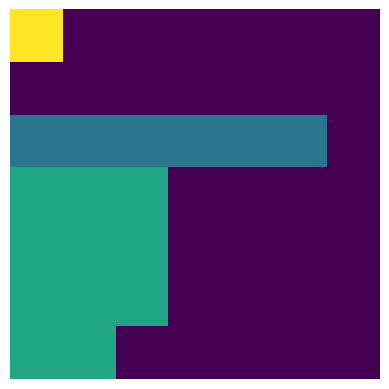

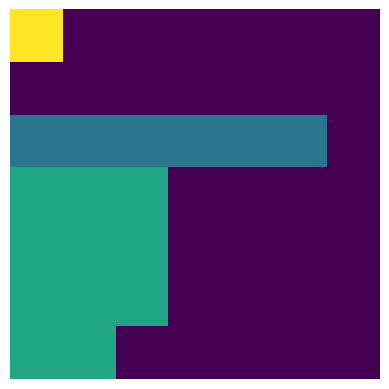

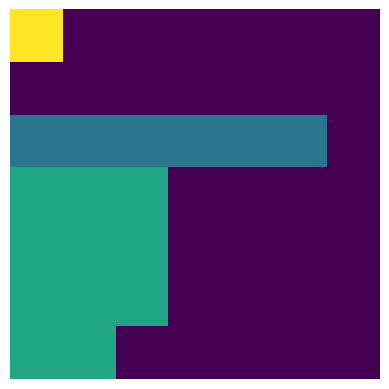

In [8]:
_, movement_of_the_random_agent =RunningAGreedyAgent.running_the_random_agent(Optimal_Value_Function, print_traj = True)

In [119]:
def test_vid(set_of_images):
    
    fig, ax = plt.subplots()
    def animate(i):
        plt.cla()
        ax.imshow(set_of_images[i], cmap='hot', interpolation='nearest')
        ax.set_title("Greedy Agent")

    # Animate
    ani = animation.FuncAnimation(fig, animate, 
                                   frames=(len(set_of_images)), interval=750, blit=False)

    writervideo = animation.FFMpegWriter(fps=1)
    ani.save('greedy_agent.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


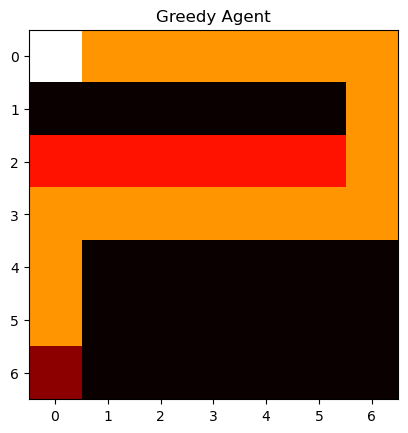

In [120]:
test_vid(movement_of_the_greedy_agent)

In [131]:
def test_vid1(set_of_images):
    
    fig, ax = plt.subplots()
    def animate(i):
        plt.cla()
        ax.imshow(set_of_images[i], cmap='hot', interpolation='nearest')
        ax.set_title("Random Agent")

    # Animate
    ani = animation.FuncAnimation(fig, animate, 
                                   frames=(len(set_of_images)), interval=750, blit=False)

    writervideo = animation.FFMpegWriter(fps=1)
    ani.save('random_agent.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.


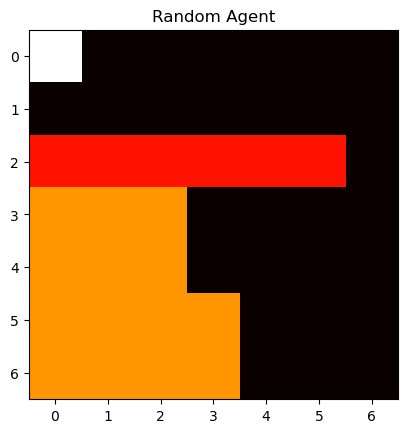

In [132]:
test_vid1(movement_of_the_random_agent)

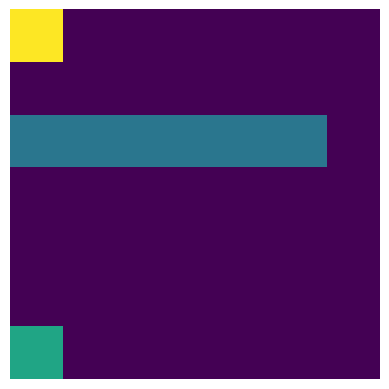

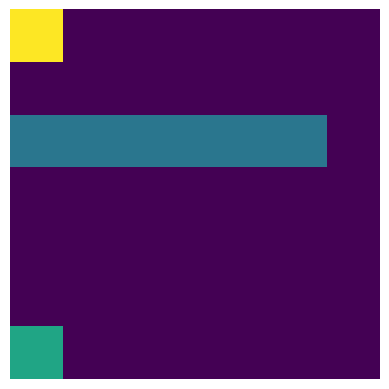

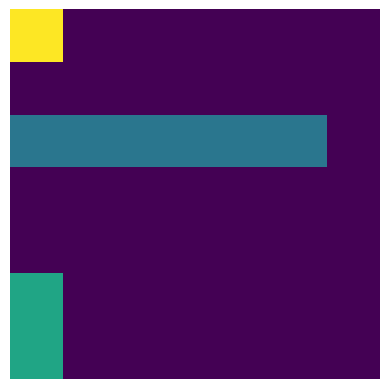

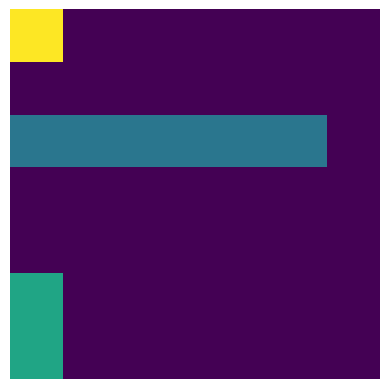

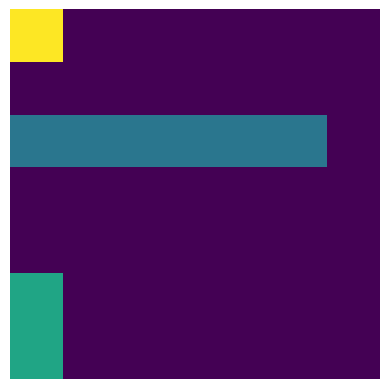

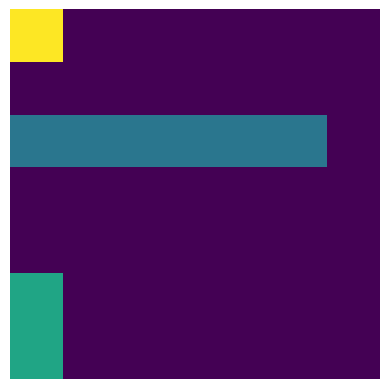

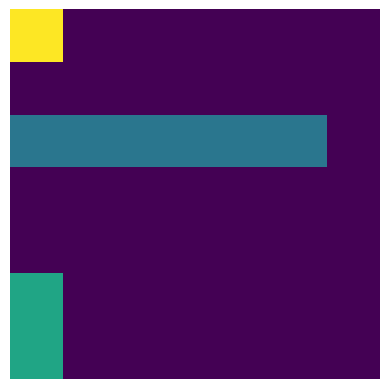

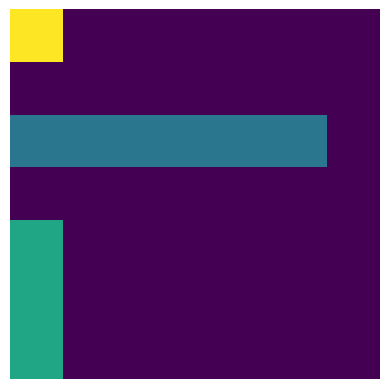

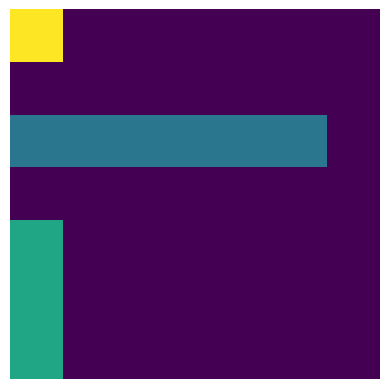

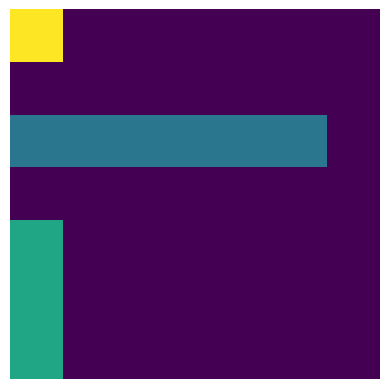

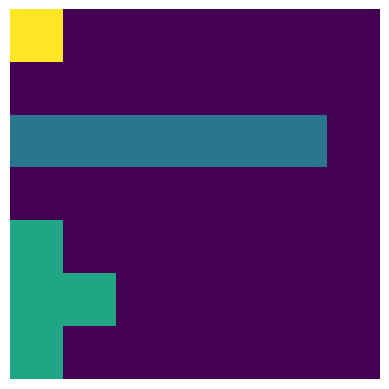

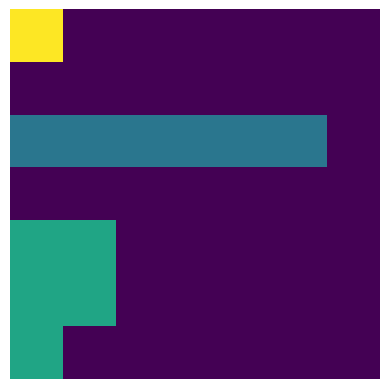

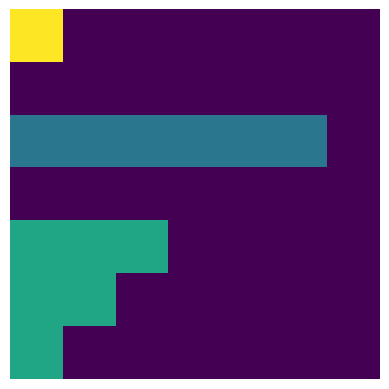

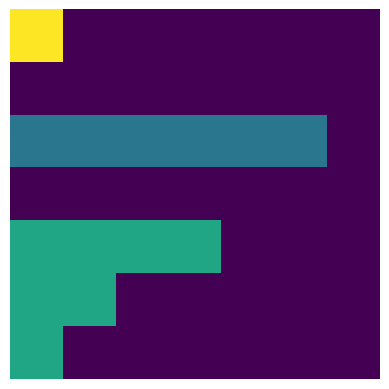

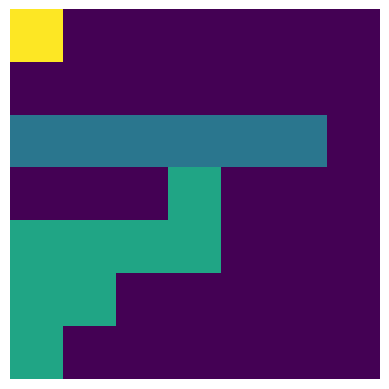

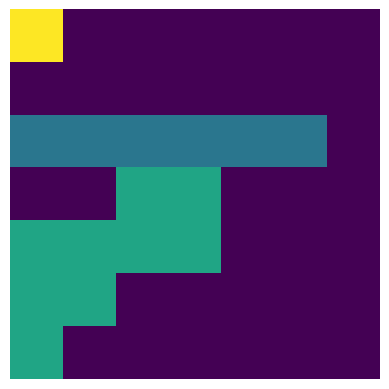

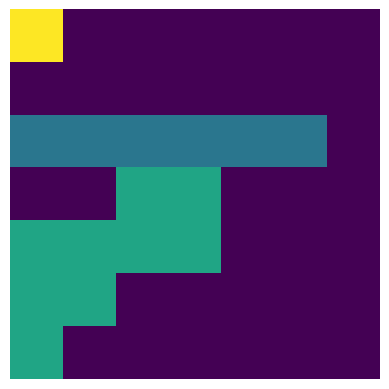

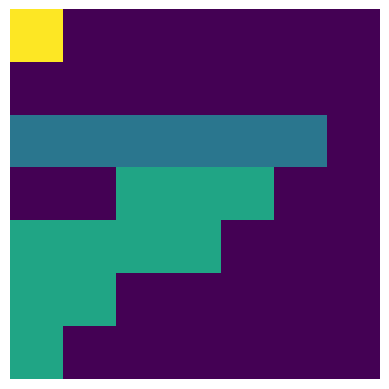

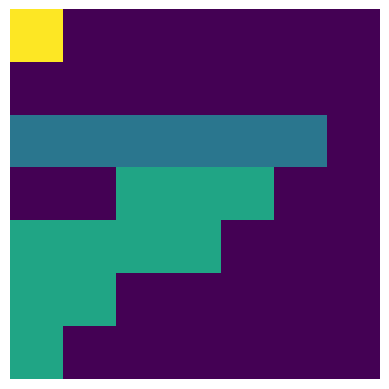

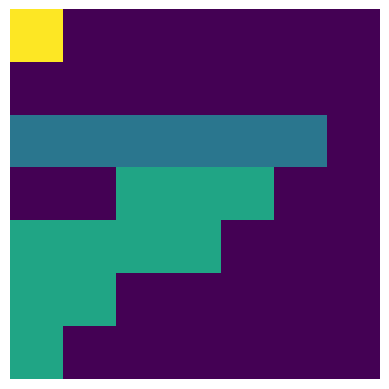

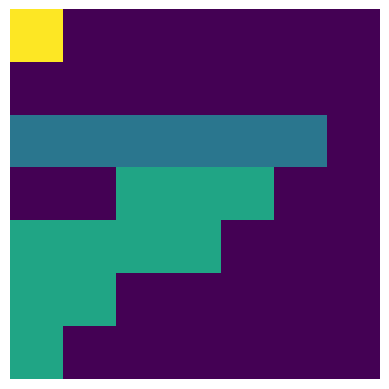

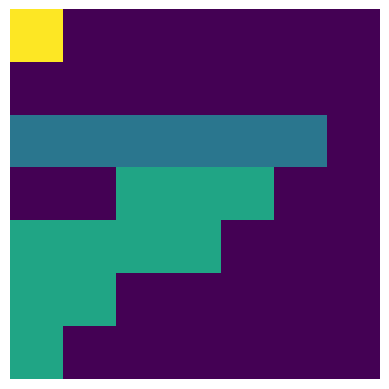

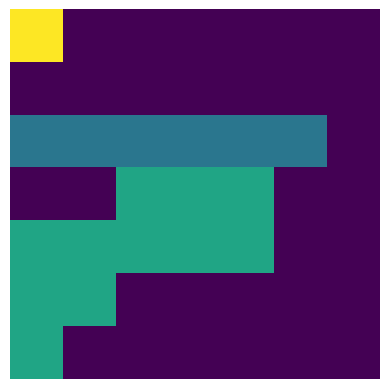

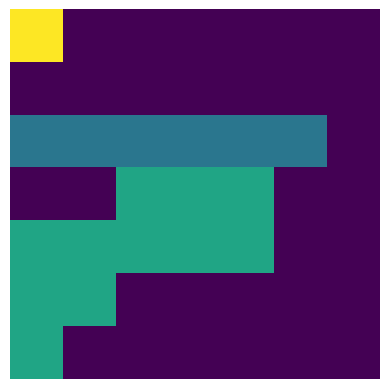

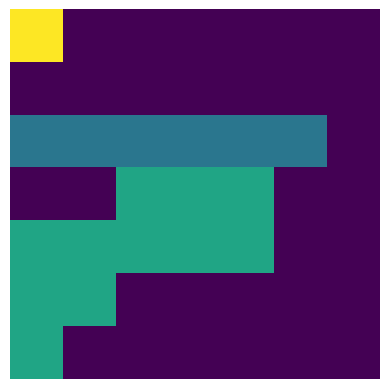

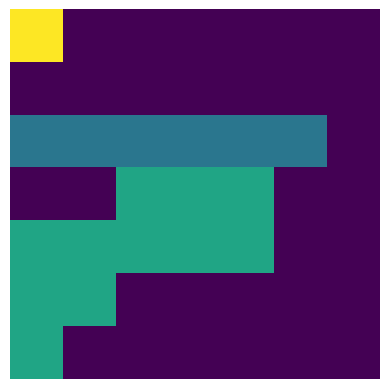

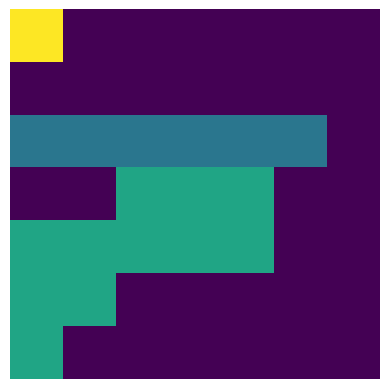

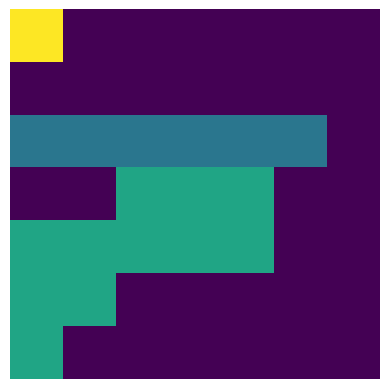

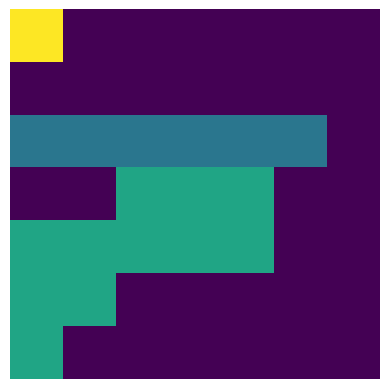

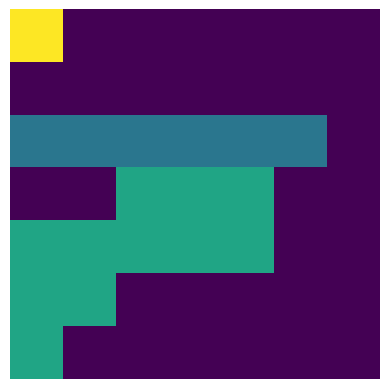

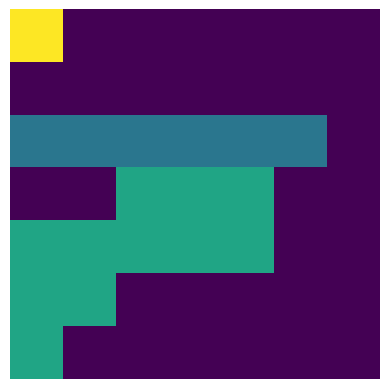

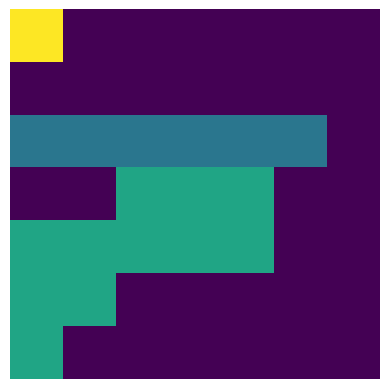

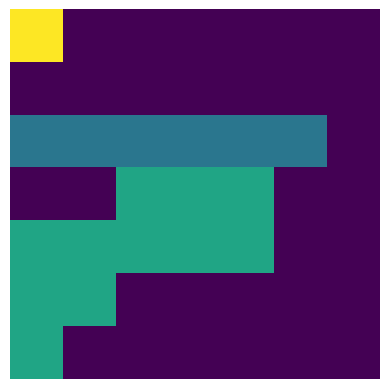

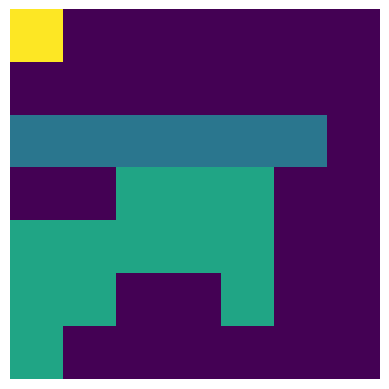

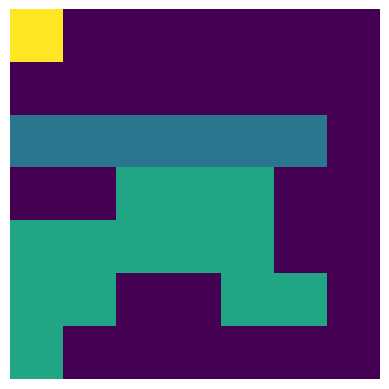

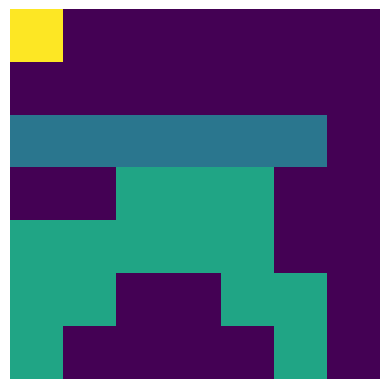

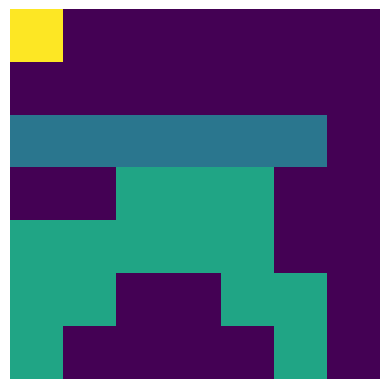

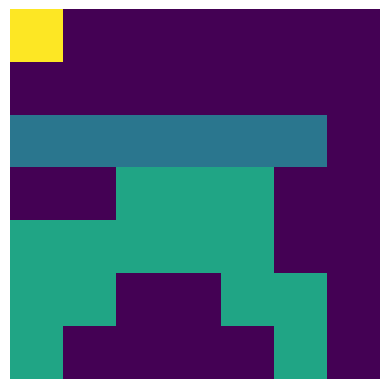

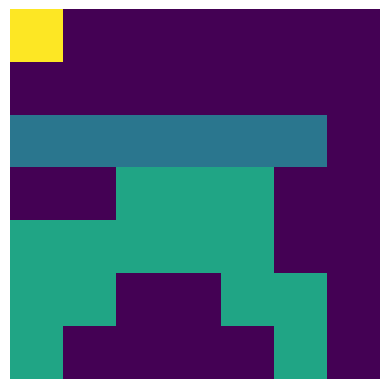

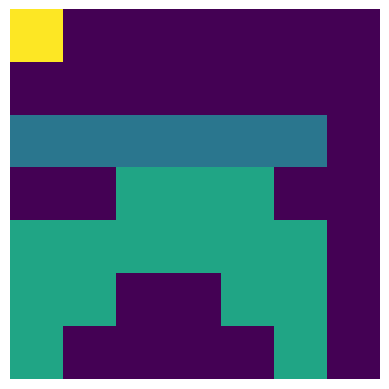

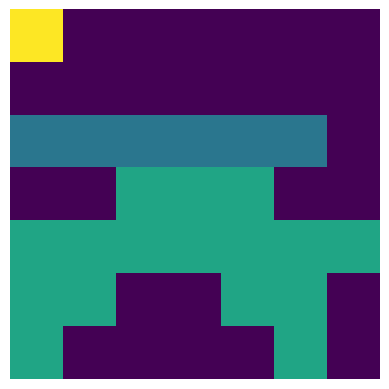

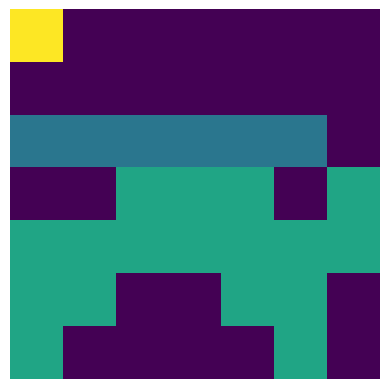

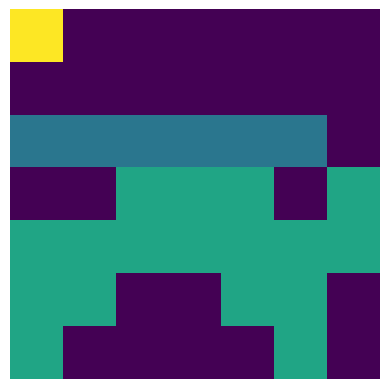

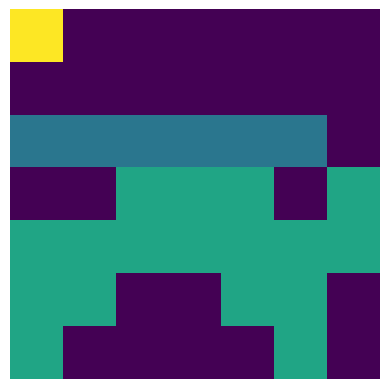

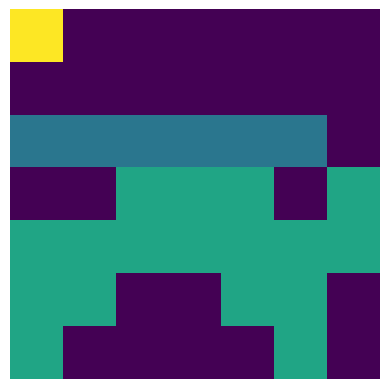

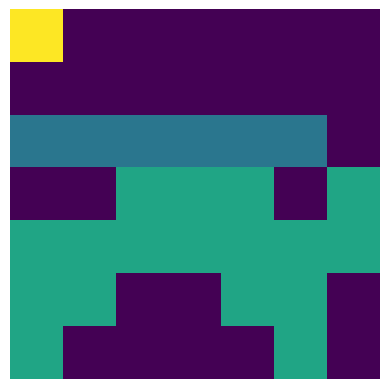

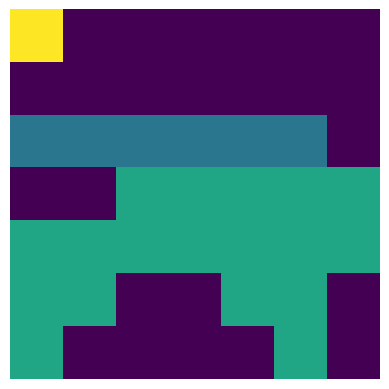

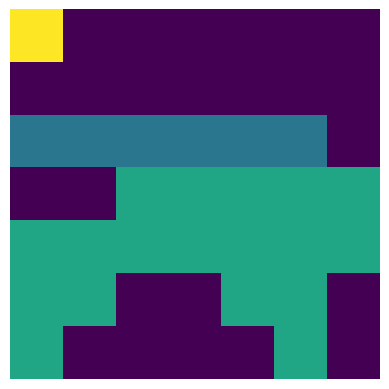

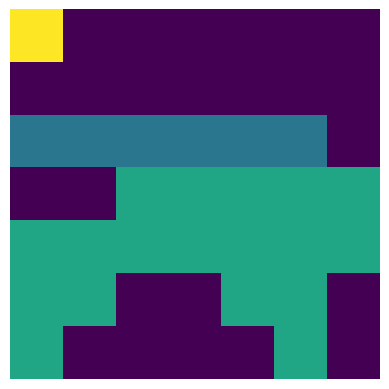

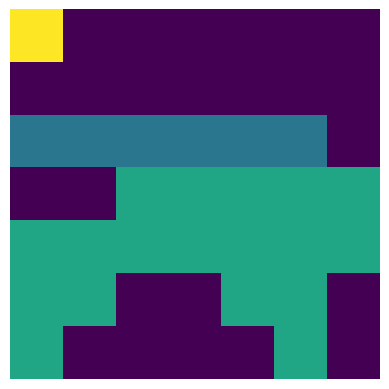

(-50.0,
 array([[[255,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [100, 100, 100, ..., 100, 100,   0],
         ...,
         [150, 150, 150, ..., 150, 150, 150],
         [150, 150,   0, ..., 150, 150,   0],
         [150,   0,   0, ...,   0, 150,   0]],
 
        [[255,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [100, 100, 100, ..., 100, 100,   0],
         ...,
         [150, 150, 150, ..., 150, 150, 150],
         [150, 150,   0, ..., 150, 150,   0],
         [150,   0,   0, ...,   0, 150,   0]],
 
        [[255,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [100, 100, 100, ..., 100, 100,   0],
         ...,
         [150, 150, 150, ..., 150, 150, 150],
         [150, 150,   0, ..., 150, 150,   0],
         [150,   0,   0, ...,   0, 150,   0]],
 
        ...,
 
        [[255,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
      

In [13]:
RunningARandomAgent = RunningAnAgent(GridWord1)
RunningARandomAgent.running_the_random_agent(Optimal_Value_Function, print_traj = True)

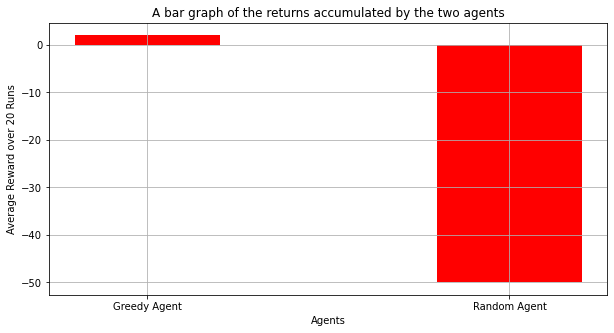

In [41]:
# 1. A bar graph of the returns accumulated by the two agents, averaged over 20 runs each.


data = {'Greedy Agent':average_greedy_agent/run, 'Random Agent':average_random_agent/run}
Agents = list(data.keys())
Average = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Agents, Average, color ='red',
        width = 0.4)
plt.grid(True)
plt.xlabel("Agents")
plt.ylabel("Average Reward over 20 Runs")
plt.title("A bar graph of the returns accumulated by the two agents")
plt.show()